<a href="https://colab.research.google.com/github/KrishnapriyaSkk/My-Jupyter-Notebooks/blob/main/handwrittendigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# This is a notebook that implements "Classification of Handwritten digit images".

1. Import Tensorflow


In [ ]:
import tensorflow as tf

print('Version: ', tf.__version__)

Version:  2.2.0


2. **Dataset** :
Import MNIST

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

3.View **shapes** of imported arrays

In [ ]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


4. Displaying an example

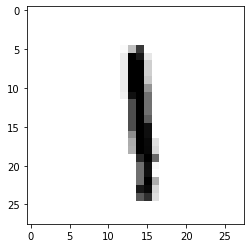

In [ ]:
from matplotlib import pyplot as pyplot
%matplotlib inline

plt.imshow(x_train[8], cmap ='binary')
plt.show()

5. Let's take a look at the label

In [ ]:
y_train[8]

1

6. Taking a look at all the labels we have


In [ ]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


7.ONE HOT ENCODING :

**Original** ..............**Encoded label**

---



0   :	..................[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

9   : ..................[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

3 	: ..................[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]



In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_enc = to_categorical(y_train)
y_test_enc = to_categorical(y_test)

8. Let's see if the encoding worked

In [ ]:
y_train_enc[8]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

7. Coverting input array into vector

In [ ]:
import numpy as np

x_train_vector = np.reshape(x_train,(60000,784))
x_test_vector = np.reshape(x_test,(10000,784))

print('x_train_vector shape:', x_train_vector.shape)
print('x_test_vector shape:', x_test_vector.shape)

x_train_vector shape: (60000, 784)
x_test_vector shape: (10000, 784)


8. Taking a look at pixel values

In [ ]:
print(set(x_train_vector[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


9. Normalizing the data

In [ ]:
x_mean = np.mean(x_train_vector)
x_sd = np.std(x_train_vector)
epsilon = 1e-10
x_train_normalised = (x_train_vector-x_mean) / (x_sd + epsilon)
x_test_normalised = (x_test_vector-x_mean) / (x_sd + epsilon)


10. Displaying normalized values

In [ ]:
print(set(x_train_normalised[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

11. CREATING A MODEL :

The 'relu' activation function is mathematically y=max(0,x)



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
                    Dense(128, activation='relu', input_shape=(784,)),
                    Dense(128,activation='relu'),
                    Dense(10, activation='softmax')
])

12.Compiling our model

Optimizers: Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses. Optimizers help to get results faster.


In [ ]:
model.compile(
    optimizer = 'sgd',
    loss ='categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


12. Let's train our model!!!

In [ ]:
model.fit(x_train_normalised, y_train_enc, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3596 - accuracy: 0.8958
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1778 - accuracy: 0.9478
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1331 - accuracy: 0.9608


13. Let us evaluate our model: 

In [ ]:
loss, accuracy=model.evaluate(x_test_normalised, y_test_enc)
print("Accuracy: ", accuracy*100)


313/313 [==============================] - 0s 1ms/step - loss: 0.1203 - accuracy: 0.9640
Accuracy:  96.39999866485596


14. Let us look at the  shape of PREDICTIONS ON TEST SET :

In [ ]:
preds = model.predict(x_test_normalised)
print('shape: ',preds.shape)

shape:  (10000, 10)


15. Now let us plot the predictions

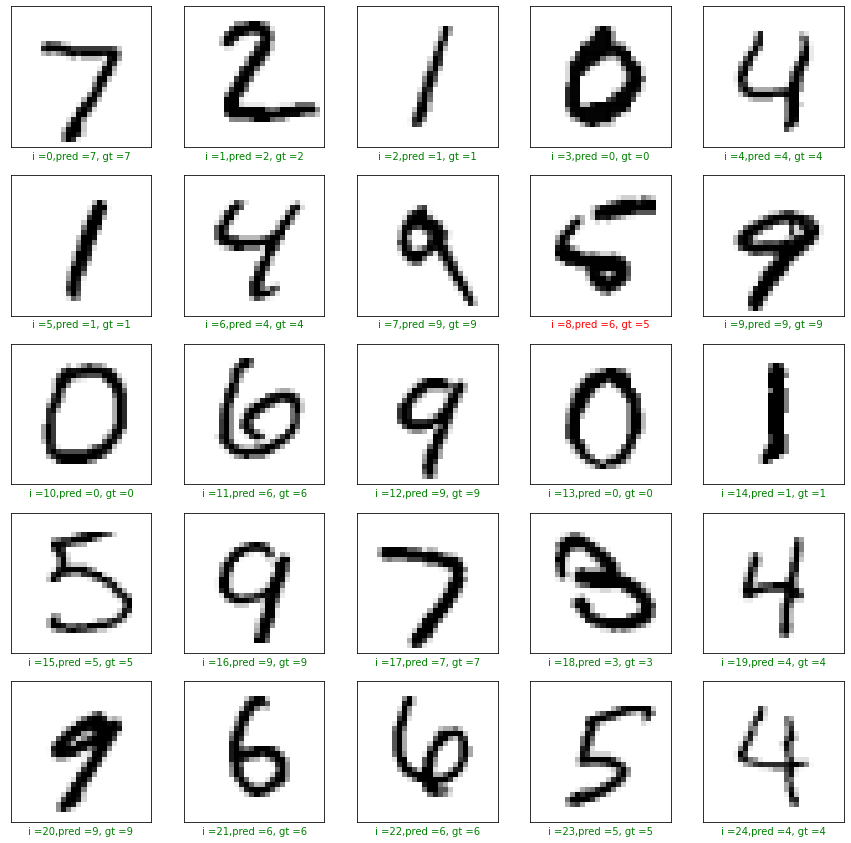

In [ ]:
plt.figure(figsize=(15,15))
index = 0

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  pred = np.argmax(preds[index+i])
  gt = y_test[index+i]

  col='g'
  if(pred != gt):
    col='r'

  plt.xlabel('i ={},pred ={}, gt ={}'.format(index+i,pred,gt), color=col)
  plt.imshow(x_test[index+i], cmap='binary')

plt.show()

  

14. Plot graph of result: 

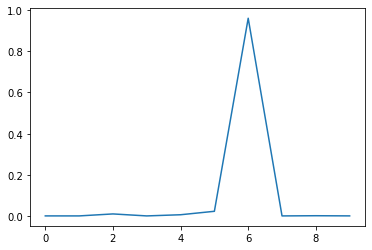

In [ ]:
plt.plot(preds[8])
plt.show()